# Data Simulation - Author: Andrew Scott

The goal of this notebook is to demonstrate how to create a new dataset that simulates a existing real world data using Python. 

In [1]:
# Package for numerical calculations and arrays
import numpy as np

# Accessing datasets
import statsmodels.api as sm

# For dataframes
import pandas as pd

# Generating plots
import matplotlib.pyplot as plt

# Generating plots 
import seaborn as sns

# For accessing dates and times
import datetime as dt

# A magic command for helping display matplotlib plots in notebooks
%matplotlib inline

### Cats Dataset

The dataset being simulated is a dataset that was originally published by Ronald Fisher that consists of cats and their gender, weight, and heart weight[x]. The dataset is part of the MASS package for the programming language R. However, these datasets can be accessed in Python using the statsmodel package. https://kolesnikov.ga/Datasets_in_Python/

In [2]:
# Load the cats dataset 
cats = sm.datasets.get_rdataset(dataname='cats', package='MASS')

In [3]:
# Print some information about the dataset 
print(cats.__doc__)

.. container::

   ==== ===============
   cats R Documentation
   ==== ===============

   .. rubric:: Anatomical Data from Domestic Cats
      :name: anatomical-data-from-domestic-cats

   .. rubric:: Description
      :name: description

   The heart and body weights of samples of male and female cats used
   for *digitalis* experiments. The cats were all adult, over 2 kg body
   weight.

   .. rubric:: Usage
      :name: usage

   ::

      cats

   .. rubric:: Format
      :name: format

   This data frame contains the following columns:

   ``Sex``
      sex: Factor with levels ``"F"`` and ``"M"``.

   ``Bwt``
      body weight in kg.

   ``Hwt``
      heart weight in g.

   .. rubric:: Source
      :name: source

   R. A. Fisher (1947) The analysis of covariance method for the
   relation between a part and the whole, *Biometrics* **3**, 65–68.

   .. rubric:: References
      :name: references

   Venables, W. N. and Ripley, B. D. (2002) *Modern Applied Statistics
   with S.* F

The documentation above states that the weight of a cat's heart and body is useful for "digitalis experiments". This refers to the drug digoxin, also known as digitalis, which is used to treat various heart conditions. A strong relationship between body weight and heart weight would mean that body weight could be used to calculate the dose that a cat should receive, as body weight is easier to directly measure than heart weight. This is how a dosage is currently calculated, with the recommended dosage being "0015 -0.002 mg/lbs every 12 hours for cats"[x] https://www.petcarerx.com/medication-guides/using-lanoxin-heart-disease-treatment-for-pets/1077. 

Due to the risk of toxicity by giving the wrong dose, simulation can be useful to provide an estimate for the rate of rare occurances, such as how often should we expect to see a cat with a high body weight and a low heart weight, which may require adjustments in dosages. 

In [4]:
# Load the cats dataset to a pandas dataframe
df_cats = cats.data

In [5]:
# View the first few rows of the dataframe
df_cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [6]:
# View the shape of the dataframe
df_cats.shape

(144, 3)

In [7]:
# View summary statistics of dataframe
df_cats.describe()

,Bwt,Hwt
count,144.000000,144.000000
mean,2.723611,10.630556
std,0.485307,2.434636
min,2.000000,6.300000
25%,2.300000,8.950000
50%,2.700000,10.100000
75%,3.025000,12.125000
max,3.900000,20.500000


In [8]:
# Show the amount of male and female cats in the dataset
df_cats['Sex'].value_counts()

M    97
F    47
Name: Sex, dtype: int64

Datetime will be used when saving dataframes and plots to give each file a unique filename containing the current time when the file was saved. Note that there will be dataframes and plots generated in this notebook that will not be backed up to avoid folders getting overly cluttered. Some are useful to be displayed for demonstrative purposes, but are not as important overall as those backed up. 

In [9]:
# Save the original dataset
# Access the current date and time.
now = dt.datetime.now()

# Formatting the current date and time as a string and saving to a variable.
current_time = now.strftime('%Y%m%d_%H%M%S')

# A path to save the dataframe, using dt to create unique file names
path = 'cats-dataset/cats-original-data/cats_original_dataset/cats_original_'  + current_time + '.csv'

# Save pandas data frame to disk.
df_cats.to_csv(path)

The above summaries gives an overview as to the dimensions and datatypes involved. There are three variable types - a binary male/female column, and two numerical columns containing body weights and heart weights. We will have to invent a fourth column when simulating this dataset to meet the criteria of simulated dataset having at least four variables. 

### Using Numpy's Random Module to Generate Simulated Data

Ignoring the sex for now and focusing on the numerical values, we could generate some random bodyweight and heartweight data using numpy by assuming a normal distribution for both variables, and using the summary statistics as a basis for the random data.

In [10]:
# Construct a new Generator with the default BitGenerator (PCG64)
# Seeded for reproducible results
rng = np.random.default_rng(seed = 501)

# Numpy randomly generated bwt with defined mean and std
# 100 random samples from a normal distribution
mu = 2.723611
sigma = 0.485307
random_bwt = rng.normal(mu, sigma, size=100)
random_bwt

array([2.17930379, 2.8431481 , 2.58133273, 2.59291175, 3.07554702,
       3.0397276 , 3.23124009, 2.53951761, 2.54360903, 3.15743213,
       3.29549089, 1.90281974, 2.3432193 , 2.593383  , 2.81058881,
       2.19762536, 3.03754655, 2.69848523, 3.19382971, 2.61704186,
       3.02988841, 2.24868163, 1.84241256, 2.8658994 , 2.95768856,
       1.29199448, 2.93591153, 1.86295528, 2.86961876, 2.61109233,
       2.86935197, 3.36814523, 3.04395907, 2.35416663, 2.50633595,
       3.35781195, 2.48054651, 2.93788186, 1.9561881 , 3.73832929,
       2.45700317, 2.10373047, 2.31305787, 2.55667255, 1.88387285,
       2.14499153, 2.88014605, 2.10001704, 2.9114496 , 2.50124325,
       2.57483043, 2.64137358, 2.83579697, 2.4796103 , 2.29659046,
       2.50352536, 1.86356256, 2.42191691, 3.18094962, 2.75987015,
       2.97608982, 2.2216094 , 2.39047272, 2.69899322, 2.48979544,
       2.41736389, 2.29241721, 2.34977951, 2.28580472, 2.49622027,
       2.18661026, 2.6883948 , 2.49648407, 2.5500638 , 2.74314

In [11]:
# Numpy randomly generated bwt with defined mean and std
# 100 random samples from a normal distribution
mu = 10.630556
sigma = 2.434636
random_hwt = rng.normal(mu, sigma, size=100)
random_hwt

array([10.70327711, 13.40663078, 12.84970519, 14.56471838,  6.10888679,
       10.26866323,  3.39810752, 13.09217136, 12.91101626,  7.6739178 ,
       11.22223463, 13.47122407, 11.99775933, 10.22979087, 13.33225091,
        8.04155487,  9.02562462, 15.08476254,  9.25996586,  7.31613876,
       14.87259583, 10.33293915, 10.15928348, 11.15132039, 10.99798703,
        8.96461709,  8.89837108,  5.21569666,  7.67256412,  9.04706882,
        6.89324895,  6.24879464,  9.71492776, 13.22696129,  7.07036394,
        6.42732728, 10.4120992 , 10.15191115, 10.84750728, 13.39416132,
        7.61068531,  7.6880468 ,  8.14014958, 12.80379584, 13.04108787,
       10.70800049,  8.98488646,  8.30251315,  6.92052211, 10.44207291,
       12.81688662,  9.24665373, 11.11225172, 11.83328487,  7.12443517,
       10.82509563, 15.50113951,  9.24621924,  9.00823422, 14.27518224,
        9.17547483, 10.39830593, 11.38067027, 10.55205973,  9.65653148,
       12.43183373,  7.61768863,  9.30786842, 13.87582411, 10.33

In [12]:
# Create a new df with the random np arrays
# code adapted from:
# https://stackoverflow.com/questions/29949757/creating-pandas-dataframe-between-two-numpy-arrays-then-draw-scatter-plot
random_df = pd.DataFrame({'random_bwt':random_bwt, 'random_hwt':random_hwt})
random_df

,random_bwt,random_hwt
0,2.179304,10.703277
1,2.843148,13.406631
2,2.581333,12.849705
3,2.592912,14.564718
4,3.075547,6.108887
...,...,...
95,2.297118,14.534721
96,2.955009,7.306640
97,1.845317,9.370722
98,1.662017,9.155159


In [13]:
# View summary statistics
random_df.describe()

,random_bwt,random_hwt
count,100.000000,100.000000
mean,2.607563,10.381145
std,0.495739,2.627939
min,1.252891,3.398108
25%,2.309073,8.805568
50%,2.578082,10.333246
75%,2.942164,12.341540
max,4.394208,17.077299


We can see from the summary statistics that our random dataframe has somewhat similar summary statistics to the original. Despite this, it is not an acceptable simulation of the original dataset. This will become apparant by plotting scatterplots of the original data and the random data.

<AxesSubplot:xlabel='Bwt', ylabel='Hwt'>

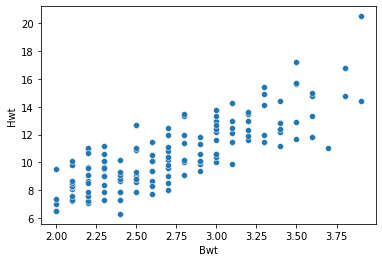

In [14]:
# sCATterplot of original bwt and hwt
sns.scatterplot(data = df_cats, x = 'Bwt', y= 'Hwt')

<AxesSubplot:xlabel='random_bwt', ylabel='random_hwt'>

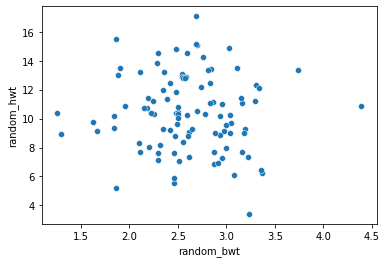

In [15]:
# sCATterplot of bwt and hwt
sns.scatterplot(data = random_df, x = 'random_bwt', y= 'random_hwt')

As we can see, there appears to be a positive correlation between a cat's bodyweight and heartweight, whereas in the random dataframe there is little correlation. Thsi can also be shown numerically. 

In [16]:
# Show the correlation bodyweight and heartweight
df_cats.corr()

,Bwt,Hwt
Bwt,1.000000,0.804127
Hwt,0.804127,1.000000


In [17]:
# Show the correlation bodyweight and heartweight
random_df.corr()

,random_bwt,random_hwt
random_bwt,1.000000,-0.055416
random_hwt,-0.055416,1.000000


This means that in general, lighter cats have lighter hearts and heavier cats have heavier hearts. While 0.8 is a very strong correlation[x], it is not perfect. There are some rather rare instances where a cat has a heavier heart than another cat that have a higher bodyweight. For that reason, it will not suffice to just sort the random values so that the lightest cat is matched with the lightest heart all the way up to the heaviest cat and the heaviest heart.  

### Simulating Correlated Data with Numpy's multivariate_normal() module

Since the data appears to be correlated, one potential solution is to assume that the data is normally distributed and then use numpy random's multivariate_normal method, which samples from multiple correlated normal distributions given the mean of the normal distributions and their covariance matrix[x].

In [18]:
# Create a df containing only the numerical bwt and hwt columns
df_cats_num = df_cats[['Bwt', 'Hwt']]

In [19]:
# Get covariance matrix of dataframe
df_cats_num.cov().to_numpy()

array([[0.23552253, 0.95011267],
       [0.95011267, 5.92745144]])

In [20]:
# Generate multivariate random data based on the original df mean, covariance, and size
mean = [2.723611, 10.630556]
cov = [[0.23552253, 0.95011267], [0.95011267, 5.92745144]]
size = 144

cats_mvn = rng.multivariate_normal(mean, cov, size)

In [21]:
# Convert random array to pandas df
df_cats_mvn = pd.DataFrame(cats_mvn, columns = ['Bwt', 'Hwt'])

In [22]:
# View description of random dataset
df_cats_mvn.describe()

,Bwt,Hwt
count,144.000000,144.000000
mean,2.727470,10.619237
std,0.426279,2.178917
min,1.756078,6.080195
25%,2.426996,8.997623
50%,2.743171,10.536973
75%,2.978730,12.087864
max,3.933044,17.655224


<AxesSubplot:xlabel='Bwt', ylabel='Hwt'>

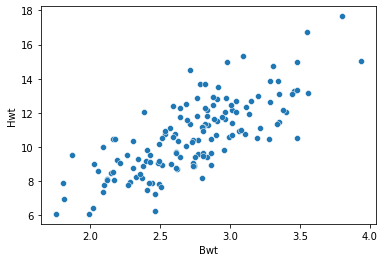

In [23]:
# Plot multivariate random data
sns.scatterplot(data = df_cats_mvn, x = 'Bwt', y= 'Hwt')

This random data certainly appears to be more in line with the original dataset. We could split the data above and below 3.0 and assign a sex of male or female to the data below 3.0 and all male to the data above 3.0, akin to the original dataset. It might be worthwhile however to dive even deeper and see if there's a difference between the sexes that would be obscured by randomly generating both sexes at once as is done here.  

As the sex of the cat may impact the other variables[x], it would be a good idea to also look at the summary statistics for each sex. 

### Seperating the Dataset Based on Sex

In [24]:
# View summary statistics for each sex
# Code adapted from: https://stackoverflow.com/questions/42579148/get-columns-describe-from-group-by
df_cats.groupby(['Sex']).describe()

Bwt                                                 Hwt             \
    count      mean       std  min   25%  50%  75%  max count       mean   
Sex                                                                        
F    47.0  2.359574  0.273988  2.0  2.15  2.3  2.5  3.0  47.0   9.202128   
M    97.0  2.900000  0.467484  2.0  2.50  2.9  3.2  3.9  97.0  11.322680   

                                            
          std  min   25%   50%   75%   max  
Sex                                         
F    1.357666  6.3  8.35   9.1  10.1  13.0  
M    2.542288  6.5  9.40  11.4  12.8  20.5

The standard deviations of the male values for body weight and heart weight are much higher than for females, suggesting there is typically a greater variation in male sizes, whereas females tend to be more similar in body and heart weights to one another. 

We can also look at the scatterplot again, this time colour-coded to differentiate the sex.

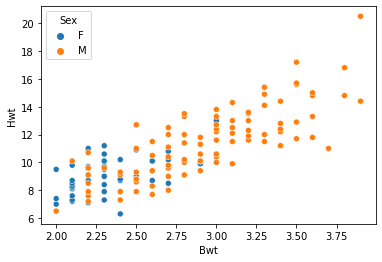

In [25]:
# sCATterplot of random bwt and hwt
sns.scatterplot(data = df_cats, x = 'Bwt', y= 'Hwt', hue = 'Sex')
# Save plot
path = 'cats-dataset/cats-original-data/cats_original_plots/cats_original_scatter'  + current_time + '.png'
plt.savefig(path)

It it will be helpful to plot the dataset to visualise the distributions of each variable. It will help to decide if the assumption of normally distributed data is justified. 

<AxesSubplot:xlabel='Bwt', ylabel='Count'>

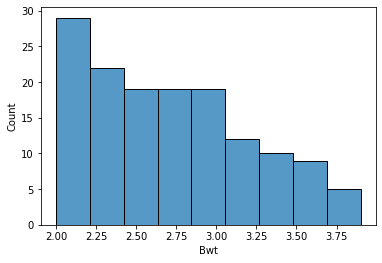

In [26]:
# Plotting the body weight of all cats
sns.histplot(data = df_cats, x = 'Bwt')

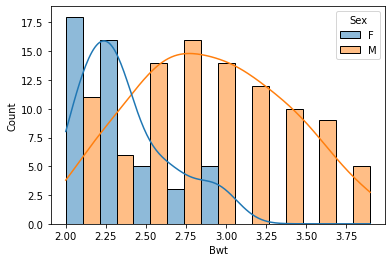

In [27]:
# Plotting the bodyweight by sex
sns.histplot(data = df_cats, x = 'Bwt', hue = 'Sex', multiple="dodge", kde=True)
# Save plot
path = 'cats-dataset/cats-original-data/cats_original_plots/cats_hist_bwt'  + current_time + '.png'
plt.savefig(path)

<AxesSubplot:xlabel='Hwt', ylabel='Count'>

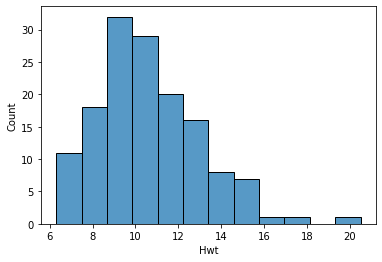

In [28]:
# Plotting the heart weight of all cats
sns.histplot(data = df_cats, x = 'Hwt')

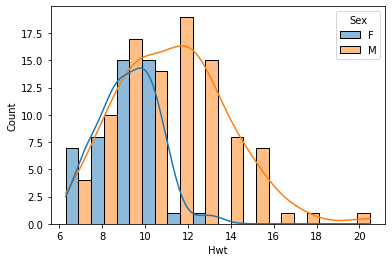

In [29]:
# Plotting the heart weight by sex
sns.histplot(data = df_cats, x = 'Hwt', hue = 'Sex', multiple="dodge", kde=True)
# Save plot
path = 'cats-dataset/cats-original-data/cats_original_plots/cats_hist_hwt'  + current_time + '.png'
plt.savefig(path)

Both the summary statistics and the plots suggest that sex has an influence over the distribution of the variables. 
The male datapoints appear to come close to the bell-shaped curve of a normal distribution, whereas the female datapoints seem to skew slightly.

It might be a good idea to create two new dataframes containing the data for each sex.

In [30]:
# code adapted from:
# https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
# New df for each sex
df_cats_female = df_cats.loc[df_cats['Sex'] == 'F']
df_cats_male = df_cats.loc[df_cats['Sex'] == 'M']

In [31]:
# Correlation of original female sample
df_cats_female.corr()

,Bwt,Hwt
Bwt,1.00000,0.53205
Hwt,0.53205,1.00000


It is interesting to note that while both males and females have a strong positive correlation between bodyweight and heartweight, the correlation is much higher in males than females.

### Testing for Normal Distribution

We can use a statistical test for normality. 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6350423/ recommends using Shapiro–Wilk test when sample sizes are under 50, which is the case with female samples. It can also be used for samples above 50, however, so it can also be used to test the male data also.

The Shapiro-Wilk tests a null hypothesis that the data comes from a normal distribution. If the p-value is greater that 0.05, then the test fails to reject that null hypothesis. 

In [32]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test on male body weight
shapiro(df_cats_male['Bwt'])

ShapiroResult(statistic=0.9788321852684021, pvalue=0.11895745247602463)

In [33]:
#perform Shapiro-Wilk test on male heart weight
shapiro(df_cats_male['Hwt'])

ShapiroResult(statistic=0.9772655963897705, pvalue=0.09039346873760223)

In [34]:
#perform Shapiro-Wilk test on female body weight
shapiro(df_cats_female['Bwt'])

ShapiroResult(statistic=0.8909613490104675, pvalue=0.0003754299250431359)

In [35]:
#perform Shapiro-Wilk test on female heart weight
shapiro(df_cats_female['Hwt'])

ShapiroResult(statistic=0.9787967205047607, pvalue=0.5434856414794922)

These test results suggest that we can assume that male body weights, heart weights, and female heart weights were drawn from a normal distribution. However, the p-value for female body weights suggests that we can assume that this data is not normally distributed. This is unusual, as weights are often normally distributed[x]. This may be a false result due to the low sample size https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/, or it may be because all cats under 2kg were excluded from the original dataset thus leaving us with a truncated normal distribution[x] https://www.statisticshowto.com/truncated-normal-distribution/

For now, we will proceed as before and use numpy random's multivariate normal to generate data for each sex and see if it will generate a sample that sufficiently simulates the original.

### Generating Simulated Data for Each Sex

Multivariate normal requires the covariance matrix as an argument to generate the random data. The covariance can be found using the .cov() method, and the values passed in an array format. 

In [36]:
# Generate random data for female cats
# Get covariance matrix for female cats
df_cats_female.cov()

,Bwt,Hwt
Bwt,0.075069,0.197914
Hwt,0.197914,1.843256


In [37]:
# Generate multivariate random data based on the original female df mean and covariance
mean_f = [2.359574, 9.202128]
cov_f = [[0.07506938, 0.19791397], [0.19791397, 1.84325624]]
size_f = 47 # Match the number of females from original dataset
female_cats_mvn = rng.multivariate_normal(mean_f, cov_f, size_f)

In [38]:
# Convert random array to pandas df
df_female_cats_mvn = pd.DataFrame(female_cats_mvn, columns = ['Bwt', 'Hwt'])

In [39]:
# View summary statistics of the random data
df_female_cats_mvn.describe()

,Bwt,Hwt
count,47.000000,47.000000
mean,2.355740,8.946741
std,0.238650,1.403378
min,1.752350,5.908395
25%,2.186459,7.889774
50%,2.329810,9.025656
75%,2.525623,9.837076
max,2.867885,11.950115


In [40]:
# Add a column with sex of female
df_female_cats_mvn['Sex'] = 'F'

In [41]:
# View dataframe
df_female_cats_mvn

,Bwt,Hwt,Sex
0,2.522447,8.297698,F
1,2.492555,10.402778,F
2,2.475531,8.502075,F
3,2.181832,9.183459,F
4,2.222886,9.146523,F
5,2.294218,8.768476,F
6,2.299740,8.734757,F
7,2.334002,9.809693,F
8,2.344861,10.873049,F
9,2.300776,11.950115,F


In [42]:
# Generate random data for male cats
# Get covariance matrix for male cats
df_cats_male.cov()

,Bwt,Hwt
Bwt,0.218542,0.94250
Hwt,0.942500,6.46323


In [43]:
# Generate multivariate random data based on the original male df mean and covariance
mean_m = [2.900000, 11.322680]
cov_m = [[0.21854167, 0.9425], [0.9425, 6.46323024]]
size_m = 97 # Match the number of males from original dataset
male_cats_mvn = rng.multivariate_normal(mean_m, cov_m, size_m)

In [44]:
# Convert random array to pandas df
df_male_cats_mvn = pd.DataFrame(male_cats_mvn, columns = ['Bwt', 'Hwt'])

In [45]:
# View summary statistics of the random data
df_male_cats_mvn.describe()

,Bwt,Hwt
count,97.000000,97.000000
mean,2.886138,11.232388
std,0.499029,2.752377
min,1.954291,4.725192
25%,2.490628,9.163956
50%,2.877611,11.037862
75%,3.203926,13.145520
max,4.308814,18.346890


In [46]:
# Add a column with sex of female
df_male_cats_mvn['Sex'] = 'M'

In [47]:
# View dataframe
df_male_cats_mvn

,Bwt,Hwt,Sex
0,2.498770,8.974813,M
1,2.772193,12.212678,M
2,2.519866,9.472758,M
3,2.294579,9.163956,M
4,2.429634,8.741393,M
...,...,...,...
92,3.008427,10.004401,M
93,2.740933,12.272868,M
94,3.148222,10.524619,M
95,3.546292,14.367670,M


In [48]:
# ConCAT male and female dfs
all_cats_mvn = pd.concat([df_female_cats_mvn, df_male_cats_mvn])

In [49]:
# Round the values of the random df to one decimal place as with the original dataset
all_cats_mvn = all_cats_mvn.round(1)

In [50]:
# Move Sex column to the front as with original dataset
# Code adapted from: https://stackoverflow.com/questions/25122099/move-column-by-name-to-front-of-table-in-pandas
sex = all_cats_mvn['Sex']
all_cats_mvn.drop(labels=['Sex'], axis=1,inplace = True)
all_cats_mvn.insert(0, 'Sex', sex)

# View dataframe to see if column moved correctly
all_cats_mvn

,Sex,Bwt,Hwt
0,F,2.5,8.3
1,F,2.5,10.4
2,F,2.5,8.5
3,F,2.2,9.2
4,F,2.2,9.1
...,...,...,...
92,M,3.0,10.0
93,M,2.7,12.3
94,M,3.1,10.5
95,M,3.5,14.4


In [51]:
# View summary statistics
all_cats_mvn.describe()

,Bwt,Hwt
count,144.000000,144.000000
mean,2.709028,10.487500
std,0.495421,2.620998
min,1.800000,4.700000
25%,2.300000,8.700000
50%,2.600000,10.300000
75%,3.100000,12.100000
max,4.300000,18.300000


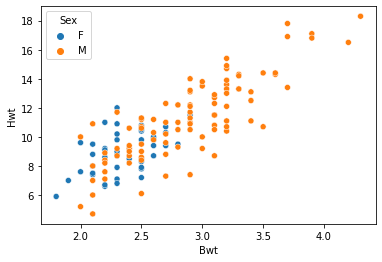

In [52]:
# sCATterplot of random bwt and hwt
sns.scatterplot(data = all_cats_mvn, x = 'Bwt', y= 'Hwt', hue = 'Sex')
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/all_cats_mvn_scatter'  + current_time + '.png'
plt.savefig(path)

In [53]:
# View the correlation between body weight and heart weight
all_cats_mvn.corr()

,Bwt,Hwt
Bwt,1.000000,0.827563
Hwt,0.827563,1.000000


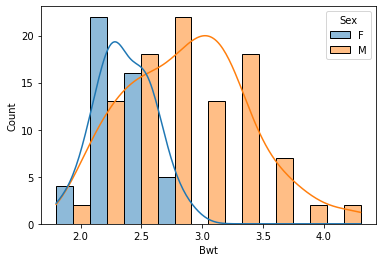

In [54]:
# Plotting the random bodyweight by sex
sns.histplot(data = all_cats_mvn, x = 'Bwt', hue = 'Sex', multiple="dodge", kde=True)
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/all_cats_mvn_hist_bwt'  + current_time + '.png'
plt.savefig(path)

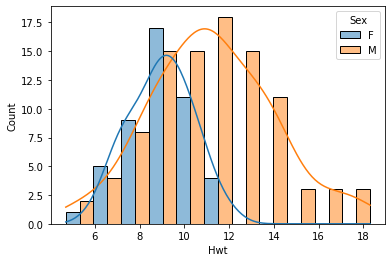

In [55]:
# Plotting the random heart weight by sex
sns.histplot(data = all_cats_mvn, x = 'Hwt', hue = 'Sex', multiple="dodge", kde=True)
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/all_cats_mvn_hist_hwt'  + current_time + '.png'
plt.savefig(path)

### Adding Additional Variable Columns

The dataset now needs more variables to meet the criteria for the assignment. Two new columns will now be randomly generated for the dataset. The first will be a unique ID for each sample, and the second will be to give each cat a name. 

In [56]:
# Variables to be used in generating the correct id numbers
count = all_cats_mvn['Bwt'].count()
possible_id = np.arange(100000,1000000)

In [57]:
# Generate random 6 digit IDs
cat_id = rng.choice(possible_id, size=count, replace=False)

In [58]:
# Add ID to df and move ID to be first column
all_cats_mvn['ID'] = cat_id
all_cats_mvn.drop(labels=['ID'], axis=1,inplace = True)
all_cats_mvn.insert(0, 'ID', cat_id)

In [59]:
# View the dataframe
all_cats_mvn

,ID,Sex,Bwt,Hwt
0,480953,F,2.5,8.3
1,978443,F,2.5,10.4
2,413795,F,2.5,8.5
3,872538,F,2.2,9.2
4,912009,F,2.2,9.1
...,...,...,...,...
92,272876,M,3.0,10.0
93,163728,M,2.7,12.3
94,296723,M,3.1,10.5
95,479809,M,3.5,14.4


A column of cat names will now be generated. A zip file containing a txt file with cat names was retreived from https://www.kessels.com/CatNames/. The file was manually edited to delete comma symbols which caused issues importing the file, and information in parentheses explaining the names were also deleted. Some offensive names were also manually removed, but some may have been missed and remain. This txt file will be used to generate random names for the cats in the random dataset.

In [60]:
# Load cat names to pandas. Changed encoding as original recorded an error
# "'utf-8' codec can't decode byte 0xda"
# https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python
cat_names = pd.read_csv('cats-dataset/CatNames.txt', names = ['Cat Names'],
                        encoding = "ISO-8859-1")

In [61]:
# Retrieve random cat names from the dataframe 
random_cat_names = rng.choice(cat_names, size=count)

In [62]:
# Add name column to dataframe
all_cats_mvn['Name'] = random_cat_names

In [63]:
# View the dataframe
all_cats_mvn

,ID,Sex,Bwt,Hwt,Name
0,480953,F,2.5,8.3,Calli
1,978443,F,2.5,10.4,Yemma-Lee
2,413795,F,2.5,8.5,Pyewackett
3,872538,F,2.2,9.2,Okee
4,912009,F,2.2,9.1,Piper Belle
...,...,...,...,...,...
92,272876,M,3.0,10.0,Amadeus
93,163728,M,2.7,12.3,Mark I love you
94,296723,M,3.1,10.5,Hedy Lammarr
95,479809,M,3.5,14.4,Kid


In [64]:
# A path to save the dataframe, using dt to create unique file names
path = 'cats-dataset/cats-random-data/cats_random_datasets/cats_random_'  + current_time + '.csv'

# Save pandas data frame to disk.
all_cats_mvn.to_csv(path)


### A Function to Generate a Simulated Cats Dataset

With the random data looking good, it would be useful to have a function that would allow us to quickly generate the amount of random samples as specified. 

In [65]:
# Function to generate number of random samples specified by user
# User specifies two numbers, one for each sex
def random_cat_df(females=1, males=1):
    # Unseeded to provide different random data each time              
    rng = np.random.default_rng()

    # Generate random female data based on original data statistics and user specified sample size
    mean_f = [2.359574, 9.202128]
    cov_f = [[0.07506938, 0.19791397], [0.19791397, 1.84325624]]
    female_cats = rng.multivariate_normal(mean_f, cov_f, females)
    
    # Convert random array to pandas df
    df_female = pd.DataFrame(female_cats, columns = ['Bwt', 'Hwt'])
    
    # Add a column with sex of female
    df_female['Sex'] = 'F'
    
    # Generate multivariate random data based on the original male df mean and covariance
    mean_m = [2.900000, 11.322680]
    cov_m = [[0.21854167, 0.9425], [0.9425, 6.46323024]]
    male_cats = rng.multivariate_normal(mean_m, cov_m, males)
    
    # Convert random array to pandas df
    df_male = pd.DataFrame(male_cats, columns = ['Bwt', 'Hwt'])
    
    # Add a column with sex of male
    df_male['Sex'] = 'M'
    
    # ConCAT male and female dfs
    all_cats = pd.concat([df_female, df_male])
    
    # Round the values of the random df to one decimal place as with the original dataset
    all_cats = all_cats.round(1)
    
    # Move Sex column to the front as with original dataset
    sex = all_cats['Sex']
    all_cats.drop(labels=['Sex'], axis=1,inplace = True)
    all_cats.insert(0, 'Sex', sex)
    all_cats
    
    # Variables to be used in generating the correct id numbers
    count = all_cats['Bwt'].count()
    possible_id = np.arange(100000,1000000)
        
    # Generate random 6 digit IDs
    cat_id = rng.choice(possible_id, size=count, replace=False)
    
    # Add ID to df and move ID to be first column
    all_cats['ID'] = cat_id
    all_cats.drop(labels=['ID'], axis=1,inplace = True)
    all_cats.insert(0, 'ID', cat_id)
    
    # Load cat names to pandas
    cat_names = pd.read_csv('cats-dataset/CatNames.txt', names = ['Cat Names'],
                        encoding = "ISO-8859-1")
    
    # Retrieve random cat names from the dataframe 
    random_cat_names = rng.choice(cat_names, size=count)
    
    # Add name column to dataframe
    all_cats['Name'] = random_cat_names
            
    return all_cats

In [66]:
# Test random cat df with a higher sample than the original
# User can change the amount of samples generated by changing the numbers passed to female and male
function_df = random_cat_df(females=100, males=200)

In [67]:
# View the dataframe
function_df

,ID,Sex,Bwt,Hwt,Name
0,322926,F,2.7,10.0,Squid
1,311727,F,2.2,10.7,Nag
2,940362,F,2.5,8.1,Pavo
3,368255,F,2.5,9.7,Purdy
4,120138,F,2.5,8.2,Cattia
...,...,...,...,...,...
195,179576,M,2.4,9.2,Onya
196,156142,M,2.6,9.6,Bungy
197,465656,M,3.0,10.9,Saru
198,314481,M,2.7,9.5,Winder


In [68]:
# View summary statistics
function_df[['Bwt', 'Hwt']].describe()

,Bwt,Hwt
count,300.000000,300.000000
mean,2.685000,10.501333
std,0.473521,2.246290
min,1.500000,3.900000
25%,2.375000,8.900000
50%,2.700000,10.200000
75%,3.000000,11.900000
max,4.200000,17.400000


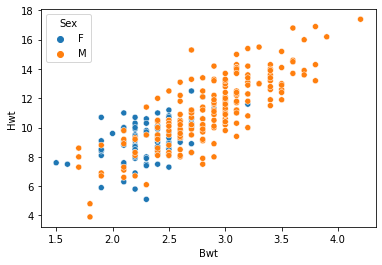

In [69]:
# sCATterplot of random function bwt and hwt
sns.scatterplot(data = function_df, x = 'Bwt', y= 'Hwt', hue='Sex')
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/cats_random_function_scatter'  + current_time + '.png'
plt.savefig(path)

In [70]:
# View the correlation between body weight and heart weight
function_df[['Bwt', 'Hwt']].corr()

,Bwt,Hwt
Bwt,1.000000,0.800085
Hwt,0.800085,1.000000


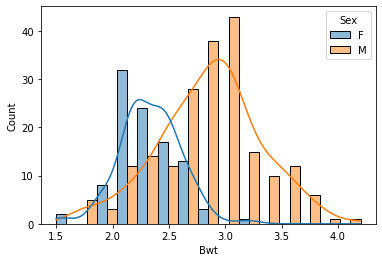

In [71]:
# Plotting the random function bodyweight by sex
sns.histplot(data = function_df, x = 'Bwt', hue = 'Sex', multiple="dodge", kde=True)
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/cats_random_function_hist_bwt'  + current_time + '.png'
plt.savefig(path)

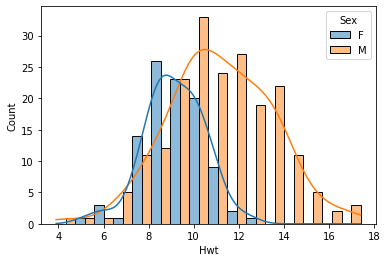

In [72]:
# Plotting the random function heart weight by sex
sns.histplot(data = function_df, x = 'Hwt', hue = 'Sex', multiple="dodge", kde=True)
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/cats_random_function_hist_hwt'  + current_time + '.png'
plt.savefig(path)

In [73]:
# A path to save the dataframe, using dt to create unique file names
path = 'cats-dataset/cats-random-data/cats_random_datasets/cats_random_function_'  + current_time + '.csv'

# Save pandas data frame to disk.
function_df.to_csv(path)

### Removing Underweight Samples

In the R documentation for the original cats dataset, it states that "The cats were all adult, over 2 kg body weight.". This may be just a coincidence, or it may be because cats under 2kg were excluded from the dataset. If it's because cats under 2kg were excluded due to some pre-existing knowledge that they would skew the data as outliers[x], we can add code to exclude entries under 2kg in body weight.

In [74]:
# Filter out values under 2kg
df_over_2kg = function_df[function_df['Bwt'] >= 2]

In [75]:
# View the dataframe
df_over_2kg

,ID,Sex,Bwt,Hwt,Name
0,322926,F,2.7,10.0,Squid
1,311727,F,2.2,10.7,Nag
2,940362,F,2.5,8.1,Pavo
3,368255,F,2.5,9.7,Purdy
4,120138,F,2.5,8.2,Cattia
...,...,...,...,...,...
195,179576,M,2.4,9.2,Onya
196,156142,M,2.6,9.6,Bungy
197,465656,M,3.0,10.9,Saru
198,314481,M,2.7,9.5,Winder


In [76]:
# View summary statistics
df_over_2kg[['Bwt', 'Hwt']].describe()

,Bwt,Hwt
count,283.000000,283.000000
mean,2.737456,10.675265
std,0.433700,2.159284
min,2.000000,5.100000
25%,2.400000,9.200000
50%,2.700000,10.300000
75%,3.000000,12.100000
max,4.200000,17.400000


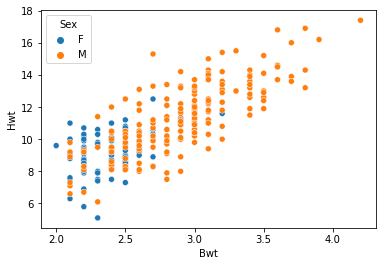

In [77]:
# scatterplot of random function >=2kg bwt and hwt
sns.scatterplot(data = df_over_2kg, x = 'Bwt', y= 'Hwt', hue='Sex')
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/df_over_2kg_scatter'  + current_time + '.png'
plt.savefig(path)

In [78]:
# View the correlation between body weight and heart weight
df_over_2kg[['Bwt', 'Hwt']].corr()

,Bwt,Hwt
Bwt,1.000000,0.789216
Hwt,0.789216,1.000000


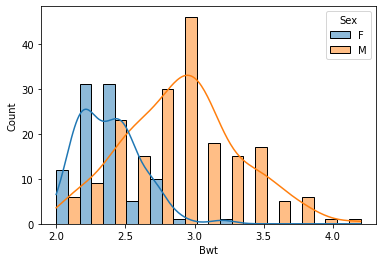

In [79]:
# Plotting the random function >=2kg bodyweight by sex
sns.histplot(data = df_over_2kg, x = 'Bwt', hue = 'Sex', multiple="dodge", kde=True)
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/df_over_2kg_hist_bwt'  + current_time + '.png'
plt.savefig(path)

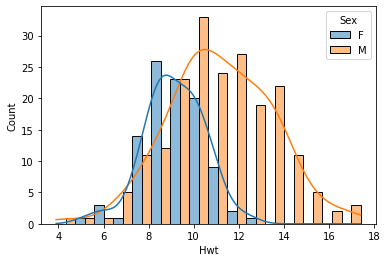

In [80]:
# Plotting the random function >=2kg heart weight by sex
sns.histplot(data = function_df, x = 'Hwt', hue = 'Sex', multiple="dodge", kde=True)
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/df_over_2kg_hist_hwt'  + current_time + '.png'
plt.savefig(path)

In [81]:
# A path to save the dataframe, using dt to create unique file names
path = 'cats-dataset/cats-random-data/cats_random_datasets/cats_random_over2kg_'  + current_time + '.csv'

# Save pandas data frame to disk.
df_over_2kg.to_csv(path)

### Dealing with the Truncated Distribution of Female Body Weight

Finally, we may wish to change code for the female bodyweight since it failed the test for normality. Since an eyeball test suggests the female body weight distribution of the original dataset is normal, but likely truncated due to excluding subjects under 2kg in body weight, we could create a new function which alters the mean to be 2.1.. This value was chosen because the bin with the most values in the original dataset is between 2.0 and 2.2kg. We will include all we have done so far in a new function generate our dataset.

Since this will be the final function that will be compared with the original dataset, the function will be seeded for reproducability. Should a user wish to generate different random datasets they can edit the following line of code in the function ```rng = np.random.default_rng(seed=501)``` by changing the number that the seed equals to or by removing "seed=180" from between the parentheses, leaving the parentheses in place. 

Another issue with the previous function is that the dataframe returned woud have fewer samples than the user specified due to samples under 2kg being removed. To account for this, we will use the function below which was made to cope with a truncated normal distribution to first generate random female weights within the bounds of the original weights https://stackoverflow.com/questions/33590760/how-to-generate-correlated-random-numbers-for-truncated-normal-distribution-in-p and combine it with an adapted version of our previous function to simulate a new complete dataframe.

In [82]:
# Function to generate number of random samples specified by user
# User specifies two numbers, one for each sex
def cat_over2kg_df(females=1, males=1):         
    rng = np.random.default_rng(seed=501)

    # convert arr_means and cov matrix to np.array
    means = np.array([2.359574, 9.202128])
    cov_matrix = np.array([[0.07506938, 0.19791397], [0.19791397, 1.84325624]])
    dimenions_bounds=np.array([[2,3],[6.3,13]])
    size = females
    
    
    # check if dimentions agree
    if not means.shape[0] == cov_matrix.shape[0]:
        raise ValueError("dimentions of means and cov matrix do not agree")
    if not cov_matrix.shape[0] == cov_matrix.shape[1]:
        raise ValueError("dimentions of means and cov matrix do not agree")

    ndims = means.shape[0]

    # if no dimenions_bounds if provided make a dimenions_bounds with np.nans
    if dimenions_bounds is None:
        dimenions_bounds = np.tile((np.nan),(ndims,2)) # make a ndims x 2 array of np.nan values
    
    
    # dimenions_bounds should be a (ndims x 2) 2d array where each row represents a dimention, 
    # and, where the first column (index=0) holds the lower bound 
    #     where the second colums (index=1) holds the upper bound
    if not dimenions_bounds.shape == (ndims,2):
        raise ValueError("dimentions of dimenions_bounds doesnt match the dimention of means")
    
    # define a local size
    local_size = size

    # create an empty array
    return_samples = np.empty([0,ndims])

    # generate new samples while the needed size is not reached
    while not return_samples.shape[0] == size:

        # get 'size' number of samples
        samples = rng.multivariate_normal(means, cov_matrix,size=local_size)

        # samples is n array of length n (as many as means, and as many as the side of the cov matrix)
        # we will stack the arrays of sample on top of each other,
        # so each row of retrun_samples is a set of n samples (each sample from one of each dimention)
        # each colums is the set of samples from one of the n dimentions

        # select only the samples that are within the upper and lower bounds for both dimentions

        # for the fist of the nd value (index = 0)

        # for each 'column' we check if the values are within the bounds of that respective column

        for dim, bounds in enumerate(dimenions_bounds):

            # keep only the samples that are bigger than the lower bound
            if not np.isnan(bounds[0]): # bounds[0] is the lower bound
                samples = samples[(samples[:,dim] > bounds[0])]  # samples[:,dim] is the column of the dim

            # keep only the samples that are smaller than the upper bound
            if not np.isnan(bounds[1]): # bounds[1] is the upper bound
                samples = samples[(samples[:,dim] < bounds[1])]   # samples[:,dim] is the column of the dim


        # input the samples into the retun samples
        return_samples = np.vstack([return_samples, samples])

        # get new size which is the difference between the requested size and the size so far.
        local_size = size - return_samples.shape[0]
    
    # return a single value when the requested size is 1 (or not specified)
    if return_samples.shape[0] == 1:
        df_female = return_samples[0]
    # otherwise 
    else:
        df_female = return_samples
    
    # Convert random array to pandas df
    df_female = pd.DataFrame(df_female, columns = ['Bwt', 'Hwt'])
    
    # Add a column with sex of female
    df_female['Sex'] = 'F'
    
    # Generate multivariate random data based on the original male df mean and covariance
    mean_m = [2.900000, 11.322680]
    cov_m = [[0.21854167, 0.9425], [0.9425, 6.46323024]]
    # Males times 2 so there will be enough samples to return when <2kg cats removed
    male_cats = rng.multivariate_normal(mean_m, cov_m, males*2)
    
    # Convert random array to pandas df
    df_male = pd.DataFrame(male_cats, columns = ['Bwt', 'Hwt'])
    
    # Add a column with sex of Male
    df_male['Sex'] = 'M'
    
    # Filter out values under 2kg
    df_male = df_male[df_male['Bwt'] >= 2]
    
    # Return the requested number of male subjects
    df_male = df_male.head(males)
    
    # ConCAT male and female dfs
    all_cats = pd.concat([df_female, df_male])
    
    # Round the values of the random df to one decimal place as with the original dataset
    all_cats = all_cats.round(1)
    
    # Move Sex column to the front as with original dataset
    sex = all_cats['Sex']
    all_cats.drop(labels=['Sex'], axis=1,inplace = True)
    all_cats.insert(0, 'Sex', sex)
    all_cats
    
    # Variables to be used in generating the correct id numbers
    count = all_cats['Bwt'].count()
    possible_id = np.arange(100000,1000000)
        
    # Generate random 6 digit IDs
    cat_id = rng.choice(possible_id, size=count, replace=False)
    
    # Add ID to df and move ID to be first column
    all_cats['ID'] = cat_id
    all_cats.drop(labels=['ID'], axis=1,inplace = True)
    all_cats.insert(0, 'ID', cat_id)
    
    # Load cat names to pandas
    cat_names = pd.read_csv('cats-dataset/CatNames.txt', names = ['Cat Names'],
                        encoding = "ISO-8859-1")
    
    # Retrieve random cat names from the dataframe 
    random_cat_names = rng.choice(cat_names, size=count)
    
    # Add name column to dataframe
    all_cats['Name'] = random_cat_names
    
            
    return all_cats

In [83]:
# Test the function to create a random sample that mimics the original
sim_df_cats = cat_over2kg_df(females=47, males=97)

In [84]:
# View the dataframe
sim_df_cats

,ID,Sex,Bwt,Hwt,Name
0,129565,F,2.2,7.7,Marika
1,971197,F,2.3,8.8,Azour Mavreen
2,746812,F,2.6,10.2,Monther
3,844637,F,2.4,10.6,Beer
4,820451,F,2.5,8.7,Fata
...,...,...,...,...,...
92,779918,M,2.5,10.0,Drive Thru
93,907362,M,3.2,12.9,Edora
94,338773,M,3.6,14.1,Uber
95,829413,M,3.2,16.2,Cassanova


In [85]:
# View summary statistics
sim_df_cats[['Bwt', 'Hwt']].describe()

,Bwt,Hwt
count,144.000000,144.000000
mean,2.721528,10.751389
std,0.485476,2.227702
min,2.000000,6.200000
25%,2.300000,9.275000
50%,2.700000,10.450000
75%,3.000000,12.425000
max,4.000000,16.600000


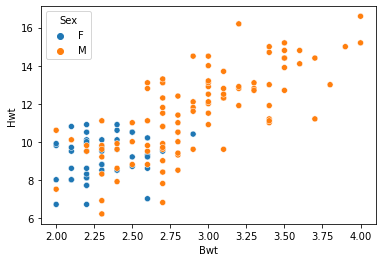

In [86]:
# scatterplot of random function >=2kg bwt and hwt
sns.scatterplot(data = sim_df_cats, x = 'Bwt', y= 'Hwt', hue='Sex')
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/sim_df_cats_scatter'  + current_time + '.png'
plt.savefig(path)

In [87]:
# View the correlation bewteen body weight and heart weight for all cats
sim_df_cats[['Bwt', 'Hwt']].corr()

,Bwt,Hwt
Bwt,1.000000,0.773409
Hwt,0.773409,1.000000


In [88]:
# Get female cats from the dataframe
sim_f = sim_df_cats[sim_df_cats['Sex'] == 'F']

In [89]:
# View the correlation bewteen body weight and heart weight for female cats
sim_f[['Bwt', 'Hwt']].corr()

,Bwt,Hwt
Bwt,1.000000,0.224173
Hwt,0.224173,1.000000


In [90]:
# Get male cats from the dataframe
sim_m = sim_df_cats[sim_df_cats['Sex'] == 'M']

In [91]:
# View the correlation bewteen body weight and heart weight for male cats
sim_m[['Bwt', 'Hwt']].corr()

,Bwt,Hwt
Bwt,1.00000,0.73795
Hwt,0.73795,1.00000


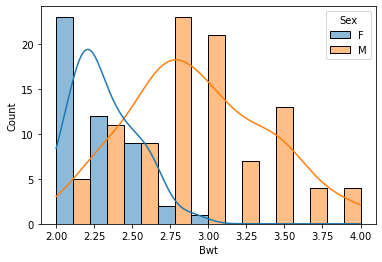

In [92]:
# Plotting the random function >=2kg bodyweight by sex
sns.histplot(data = sim_df_cats, x = 'Bwt', hue = 'Sex', multiple="dodge", kde=True)
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/sim_df_cats_hist_bwt'  + current_time + '.png'
plt.savefig(path)

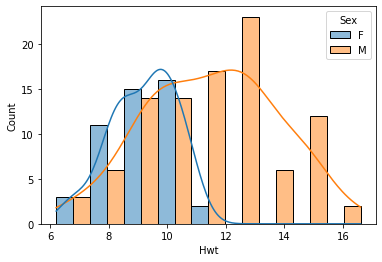

In [93]:
# Plotting the random function >=2kg heartweight by sex
sns.histplot(data = sim_df_cats, x = 'Hwt', hue = 'Sex', multiple="dodge", kde=True)
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/sim_df_cats_hist_hwt'  + current_time + '.png'
plt.savefig(path)

In [94]:
# A path to save the dataframe, using dt to create unique file names
path = 'cats-dataset/cats-random-data/cats_random_datasets/cats_random_original_size_'  + current_time + '.csv'

# Save pandas data frame to disk.
sim_df_cats.to_csv(path)

In [95]:
# Test the function to create a random sample of a new size
sim_cats_final = cat_over2kg_df(females=150, males=300)

In [96]:
# View the dataframe
sim_cats_final

,ID,Sex,Bwt,Hwt,Name
0,331899,F,2.2,7.7,Pookahontas
1,775651,F,2.3,8.8,Annelee
2,338459,F,2.6,10.2,Obo
3,764833,F,2.4,10.6,Pashu
4,678267,F,2.5,8.7,Breanne
...,...,...,...,...,...
301,114895,M,2.7,11.4,Macbeth
302,913836,M,2.7,12.6,Cinnamon Crumb Cake
303,574103,M,2.8,14.9,Elle
304,200894,M,3.2,10.7,Kitty Mouse


In [97]:
# View summary statistics
sim_cats_final[['Bwt', 'Hwt']].describe()

,Bwt,Hwt
count,450.000000,450.000000
mean,2.729111,10.641556
std,0.456452,2.371224
min,2.000000,4.700000
25%,2.400000,8.825000
50%,2.700000,10.200000
75%,3.000000,12.100000
max,4.300000,18.700000


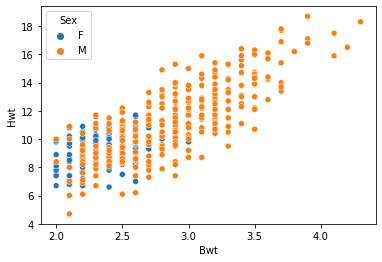

In [98]:
# scatterplot of random function >=2kg bwt and hwt
sns.scatterplot(data = sim_cats_final, x = 'Bwt', y= 'Hwt', hue='Sex')
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/sim_cats_final_scatter'  + current_time + '.png'
plt.savefig(path)

In [99]:
# View the correlation bewteen body weight and heart weight for all cats
sim_cats_final[['Bwt', 'Hwt']].corr()

,Bwt,Hwt
Bwt,1.000000,0.795237
Hwt,0.795237,1.000000


In [100]:
# Get female cats from the dataframe
sim_f_final = sim_cats_final[sim_cats_final['Sex']=='F']

In [101]:
# View the correlation bewteen body weight and heart weight for female cats
sim_f_final[['Bwt', 'Hwt']].corr()

,Bwt,Hwt
Bwt,1.000000,0.371696
Hwt,0.371696,1.000000


In [102]:
# Get male cats from the dataframe
sim_m_final = sim_cats_final[sim_cats_final['Sex']=='M']

In [103]:
# View the correlation bewteen body weight and heart weight for male cats
sim_m_final[['Bwt', 'Hwt']].corr()

,Bwt,Hwt
Bwt,1.000000,0.784121
Hwt,0.784121,1.000000


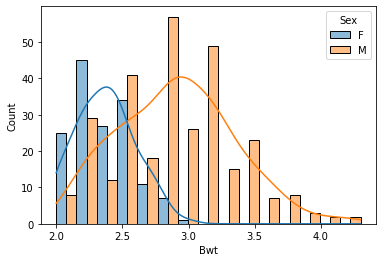

In [104]:
# Plotting the final simulated df by bodyweight
sns.histplot(data = sim_cats_final, x = 'Bwt', hue = 'Sex', multiple="dodge", kde=True)
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/sim_cats_final_hist_bwt'  + current_time + '.png'
plt.savefig(path)

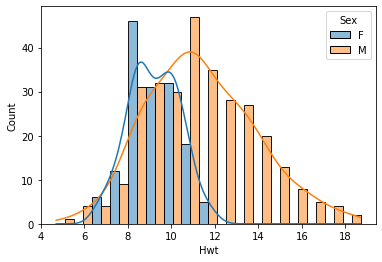

In [105]:
# Plotting the final simulated df by heartweight
sns.histplot(data = sim_cats_final, x = 'Hwt', hue = 'Sex', multiple="dodge", kde=True)
# Save plot
path = 'cats-dataset/cats-random-data/cats_random_plots/sim_cats_final_hist_hwt'  + current_time + '.png'
plt.savefig(path)

In [106]:
# A path to save the dataframe, using dt to create unique file names
path = 'cats-dataset/cats-random-data/cats_random_datasets/cats_random_final_'  + current_time + '.csv'

# Save pandas data frame to disk.
sim_cats_final.to_csv(path)